In [ ]:
import pandas as pd
import ast

from datasets import load_dataset
import matplotlib.pyplot as plt
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)
                                        if pd.notna(skill_list) else skill_list
                                        )



c:\Users\shabi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from adjustText import adjust_text

In [3]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()


In [4]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)
skill_count=20
# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap
10 azure
11 oracle
12 aws
13 sql server
14 go
15 flow
16 vba
17 looker
18 snowflake
19 qlik


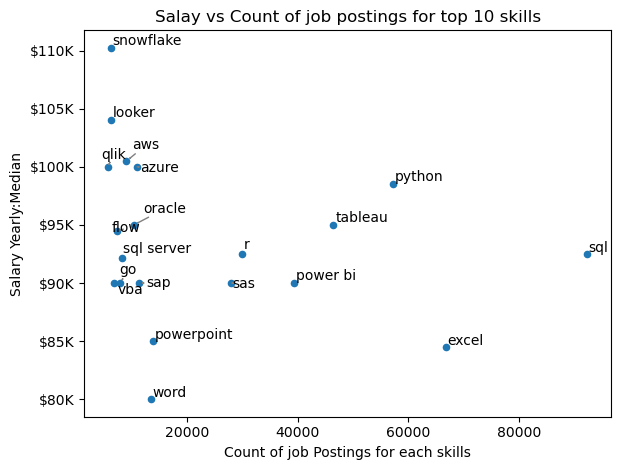

In [5]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of job Postings for each skills')
plt.ylabel('Salary Yearly:Median')
plt.title('Salay vs Count of job postings for top 10 skills')
plt.tight_layout()
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
texts=[]
for i,txt in enumerate(skill_stats.index):
    print(i,txt)
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
    
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray',lw=1))
plt.show()

In [6]:
#https://www.youtube.com/watch?v=wUSDVGivd-8
#9h6m